### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [2]:
df= pd.read_csv("../data/USA_Housing.csv")
df.head(5)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...  
1  188 Johnson Views Suite 079\r\nLake Kathleen, ...  
2  9127 Elizabeth Stravenue\r\nDanieltown, WI 064...  
3                        USS Barnett\r\nFPO AP 44820  
4                       USNS Raymond\r\nFPO AE 09386

Voy a hacer la regresión lineal con price como target y la columna Avg. Area Income

In [3]:
y = df['Price'].values
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [4]:
X =df['Avg. Area Income'].values
X = X.reshape(-1,1)
X.reshape(-1,1)
X.shape

(5000, 1)

In [5]:
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

train_errors, val_errors = [], []

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)
    
    for m in range(1, len(X_train)):  # Incremental
        
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_absolute_error(y, y_train_predict))
        val_errors.append(mean_absolute_error(y_val, y_val_predict))
        
        

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

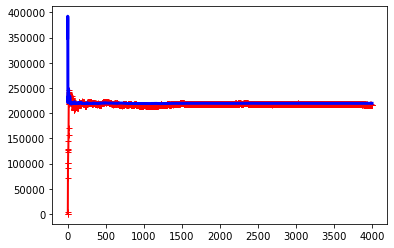

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [17]:
#Cálculo de la pendiente (b)
b = lin_reg.coef_
# a, secante (a)
a = lin_reg.intercept_
print('pendiente ', b) 
print('secante ' , a)


pendiente  [21.74006745]
secante  -255374.48784772842


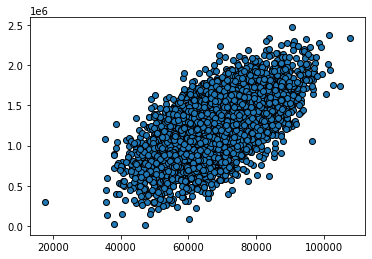

In [18]:
plt.scatter(X,y, edgecolor='black')

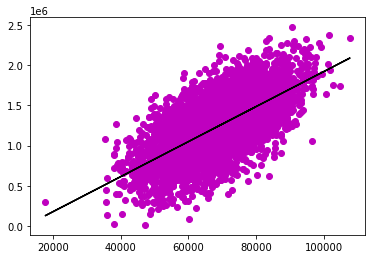

In [19]:
plt.scatter(X, y, color='m')
plt.plot(X, lin_reg.predict(X), color='k')

plt.show()

In [50]:
colum_rl = ('Avg. Area Income',	'Avg. Area House Age',	'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',	'Area Population')

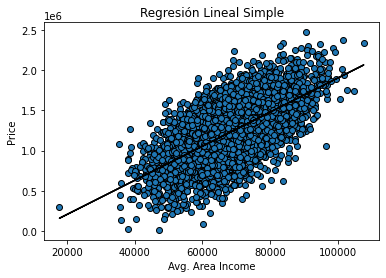

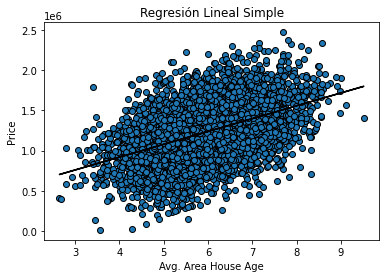

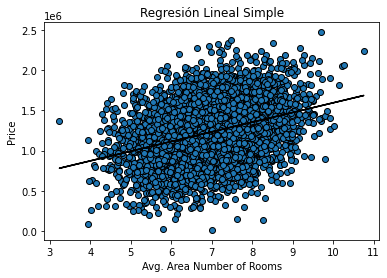

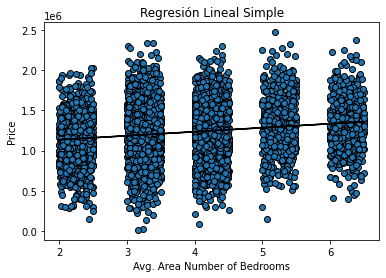

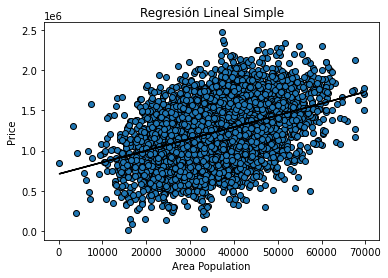

In [120]:
for elem in colum_rl:
    X1 = df[elem].values.reshape(-1,1) #Convierto la columna del df en una matriz de una sola columna.
    y1 = df['Price']#.values.reshape(-1,1)
    X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.20)
    lineal_reg = LinearRegression()# Creando objeto de regresion
    lineal_reg.fit(X1_train,y1_train) # Entrenando
    plt.scatter(X1,y1, edgecolor='black') # Muestro todos los valores como puntos
    plt.plot(X1, lineal_reg.predict(X1), color='k') #Dibujo la línea de la regresión lineal
    plt.title('Regresión Lineal Simple')
    plt.xlabel(elem)
    plt.ylabel('Price')
    plt.show()
